# Trabajo Práctico 0: Generador de Señales Senoidales

**Alumna:** Maria Serena Gil  
**Materia:** Analisis y Prcesamiento de Señales  

En este trabajo práctico desarrollare una función en Python para generar señales senoidales parametrizables.

## Consigna

Se pide programar una función que genere señales senoidales y permita parametrizar:

- Amplitud máxima (volts)
- Valor medio (volts)
- Frecuencia (Hz)
- Fase (radianes)
- Cantidad de muestras digitalizadas por el ADC
- Frecuencia de muestreo del ADC

La función debe poder llamarse de la siguiente manera:

```python
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs)
```

## Desarrollo de la función, ejemplo de uso y visualizacion

A continuación defino la función `mi_funcion_sen`, que genera una señal senoidal según los parámetros indicados y se muestra cómo utilizar la función para generar y graficar una señal senoidal.

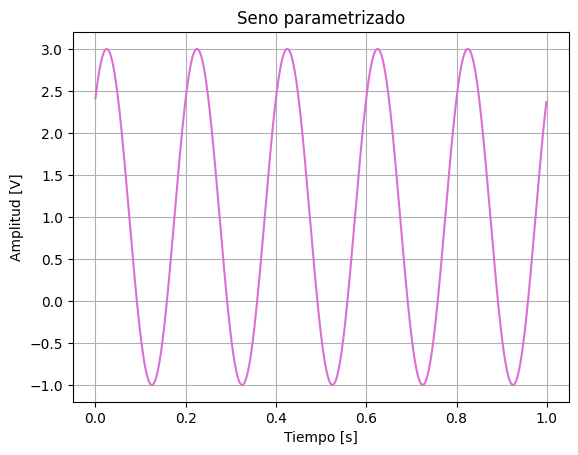

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genera una señal senoidal.
    """
    """Vector de tiempos"""
    t = np.arange(0, nn) / fs
    """Señal senoidal parametrizada"""
    x = dc + vmax * np.sin(2 * np.pi * ff * t + ph)
    return t, x

N = 1000
fs = 1000
tt, xx = mi_funcion_sen(vmax=2, dc=1, ff=5, ph=np.pi/4, nn=N, fs=fs)

plt.plot(tt, xx,color='orchid')
plt.title("Seno parametrizado")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

## Experimentos con diferentes frecuencias

A continuación se muestran gráficos de la señal senoidal generada para distintos valores de frecuencia (ff): 500 Hz, 999 Hz, 1001 Hz y 2001 Hz, manteniendo el resto de los parámetros constantes.

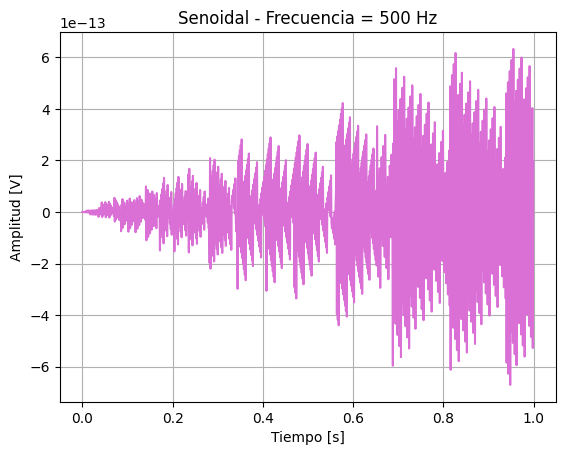

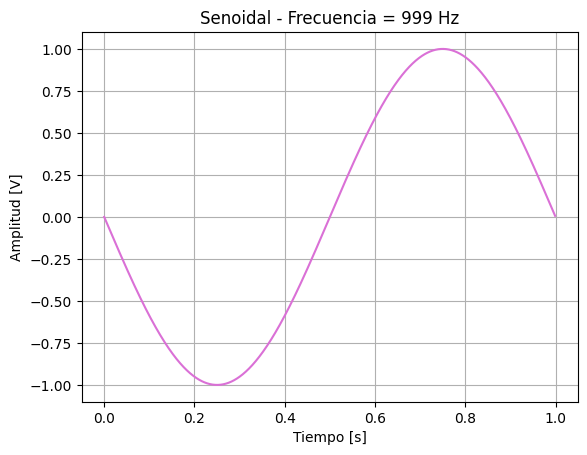

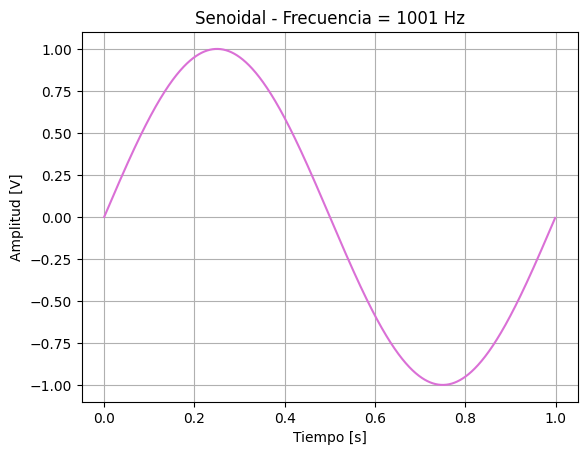

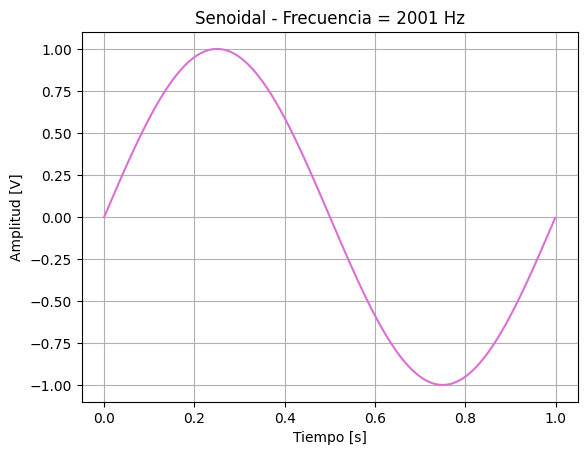

In [4]:
N = 1000
fs = 1000
frecuencias = [500, 999, 1001, 2001]

for ff in frecuencias:
    tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=ff, ph=0, nn=N, fs=fs)
    plt.figure()
    plt.plot(tt, xx, color='orchid')
    plt.title(f"Senoidal - Frecuencia = {ff} Hz")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud [V]")
    plt.grid(True)
    plt.show()

## Observaciones sobre aliasing

Mientras probaba la función con frecuencias cercanas o mayores a la mitad de la frecuencia de muestreo (fs/2 = 500 Hz), noté que la forma de la señal en el gráfico cambiaba completamente y ya no coincidía con la frecuencia real que yo había puesto.  
Esto pasa por el fenómeno de **aliasing**: básicamente, cuando la frecuencia de la señal es muy alta para la cantidad de muestras que tomo, el gráfico termina mostrando una frecuencia “falsa” que no es la original.  
Por eso, es súper importante elegir bien la frecuencia de muestreo si quiero digitalizar señales y que se vean como realmente son.

## Bonus: Generación de una onda cuadrada

Además de la señal senoidal, implementé una función para generar una onda cuadrada. Esto me permitió comparar visualmente ambas señales y entender cómo se pueden construir diferentes formas de onda a partir de funciones matemáticas simples.

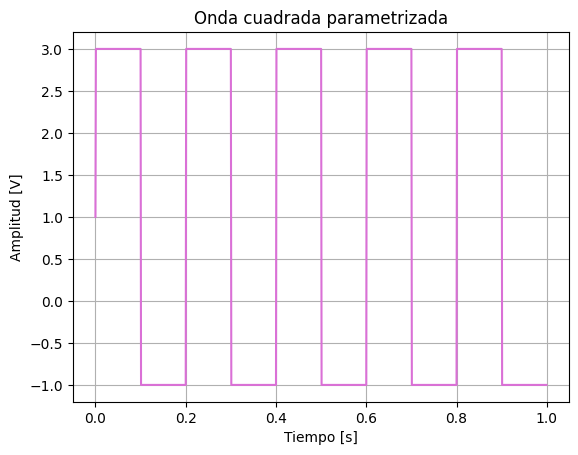

In [6]:
def mi_funcion_cuad(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    t = np.arange(0, nn) / fs
    x = dc + vmax * np.sign(np.sin(2 * np.pi * ff * t + ph))
    return t, x

tt, xx = mi_funcion_cuad(vmax=2, dc=1, ff=5, ph=0, nn=N, fs=fs)

plt.plot(tt, xx, color='orchid')
plt.title("Onda cuadrada parametrizada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)
plt.show()

## Conclusiones

Este trabajo me ayudó a entender en profundidad cómo se generan y parametrizan señales digitales en Python. Experimentar con diferentes frecuencias me permitió observar el fenómeno del aliasing y la importancia de la frecuencia de muestreo.  
Además, al implementar la onda cuadrada, pude comparar distintas formas de onda y reforzar conceptos de procesamiento de señales.  
Siento que ahora tengo una base sólida para abordar simulaciones más complejas en la materia y para seguir explorando el mundo de las señales digitales.